# Student Performance Analysis using CRISP-DM practices

For this project I decided to analyse the Student Study performance dataset found on Kaggle: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance using the CRISP-DM Process of:

- Business Understanding
- Data Understanding
- Prepare Data
- Data Modeling
- Evaluate the Results
- Deploy


### Business Understanding
The dataset comprises the following fields:
- gender: The student's gender (Male/Female).

- race/ethnicity: The student's race/ethnicity (Groups A to E).

- parental level of education: The highest education level attained by the student's parents.

- lunch: Type of lunch had by the student (standard or free/reduced).

- test preparation course: Indicates if the student completed a test preparation course (none/completed).

- math score: Student's score in mathematics.

- reading score: Student's score in reading.

- writing score: Student's score in writing.

### Objective
Therefore, through this project I aim to answer the following key questions:
1. How does the gender of students affect their performance in math, reading, and writing?
2. Does the level of parental education influence student performance across subjects?
3. How does participation in a test preparation course impact student scores?

### Data Understanding
To get started, lets start with importing our libraries and dataset

In [31]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('study_performance.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Exploratory data analysis
From the above, it is clear we have 1000 rows. lets perform some data cleaning and preparation. We shall check for
- missing values 
- duplicated values
- that scores are integers or floats and convert them to float if they are not, assuming 'math_score', 'reading_score', and 'writing_score' need to be numeric

In [3]:
# 1. Check for Missing Values
# Display the count of missing values for each column
print(df.isnull().sum())

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


From above its clear, that luckily there are no missing values.

In [4]:
# 2. Check for Duplicates
# Display the number of duplicate rows
df.duplicated().sum()

0

There are also no duplicated values

In [5]:
# 3. Data Type Consistency
# Ensure that scores are integers or floats
# Convert them to float if they are not, assuming 'math score', 'reading score', and 'writing score' need to be numeric
df['math_score'] = df['math_score'].astype(float)
df['reading_score'] = df['reading_score'].astype(float)
df['writing_score'] = df['writing_score'].astype(float)

In [6]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


### Descriptive Statistics
Let's calculate the basic Statistical Central values

In [7]:
# Descriptive Statistics
# Calculate mean, median, mode, range, and standard deviation for the scores
mean = df[['math_score', 'reading_score', 'writing_score']].mean()

median = df[['math_score', 'reading_score', 'writing_score']].median()

mode = df[['math_score', 'reading_score', 'writing_score']].mode().iloc[0]

In [8]:
# Calculating the difference between the largest and the smallest scores
ranges = df[['math_score', 'reading_score', 'writing_score']].apply(lambda x: x.max() - x.min())

std_dev = df[['math_score', 'reading_score', 'writing_score']].std()

In [9]:
ranges

math_score       100.0
reading_score     83.0
writing_score     90.0
dtype: float64

There is quite a large range for scores in all the subjects

In [10]:
std_dev

math_score       15.163080
reading_score    14.600192
writing_score    15.195657
dtype: float64

#### Compare scores based on different categorical race/ethnicity
Let's try to calculate the difference in scores for each of the race groups, and the impact of the quality of food in lunch

In [11]:
# Calculating average scores for each racial group
df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

,race_ethnicity,math_score,reading_score,writing_score
0,group A,61.629213,64.674157,62.674157
1,group B,63.452632,67.352632,65.600000
2,group C,64.463950,69.103448,67.827586
3,group D,67.362595,70.030534,70.145038
4,group E,73.821429,73.028571,71.407143


As we can observe, group E performs best on average for all subjects, however group A's performance in tests is the least on average

In [13]:
# Calculating average scores for each the kind of lunch received
df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

,lunch,math_score,reading_score,writing_score
0,free/reduced,58.921127,64.653521,63.022535
1,standard,70.034109,71.654264,70.823256


It can be observed that the students who received the standard lunches performed markedly better

In [14]:
# Checking the correlation between scores
df[['math_score', 'reading_score', 'writing_score']].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


We can conclude that the reading and writing test scores are highly correlated as expected. They are both related to language skills.

Lets try to find the correlation of gender, parental_level_of_education, and test_preparation_course with the scores. We will first perform One-Hot-Encoding of the variables, and then calculate the results

In [29]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'parental_level_of_education', 'test_preparation_course', 'lunch', 'race_ethnicity'])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Filter the correlation matrix to show only correlations with scores
score_correlations = correlation_matrix[['math_score', 'reading_score', 'writing_score']].drop(['math_score', 'reading_score', 'writing_score'], axis=0)

score_correlations

,math_score,reading_score,writing_score
gender_female,-0.167982,0.244313,0.301225
gender_male,0.167982,-0.244313,-0.301225
parental_level_of_education_associate's degree,0.063228,0.064386,0.064799
parental_level_of_education_bachelor's degree,0.079664,0.096024,0.128297
parental_level_of_education_high school,-0.128725,-0.151068,-0.182211
parental_level_of_education_master's degree,0.060417,0.106452,0.125693
parental_level_of_education_some college,0.037056,0.010782,0.027989
parental_level_of_education_some high school,-0.079852,-0.071369,-0.097326
test_preparation_course_completed,0.177702,0.241780,0.312946
test_preparation_course_none,-0.177702,-0.241780,-0.312946


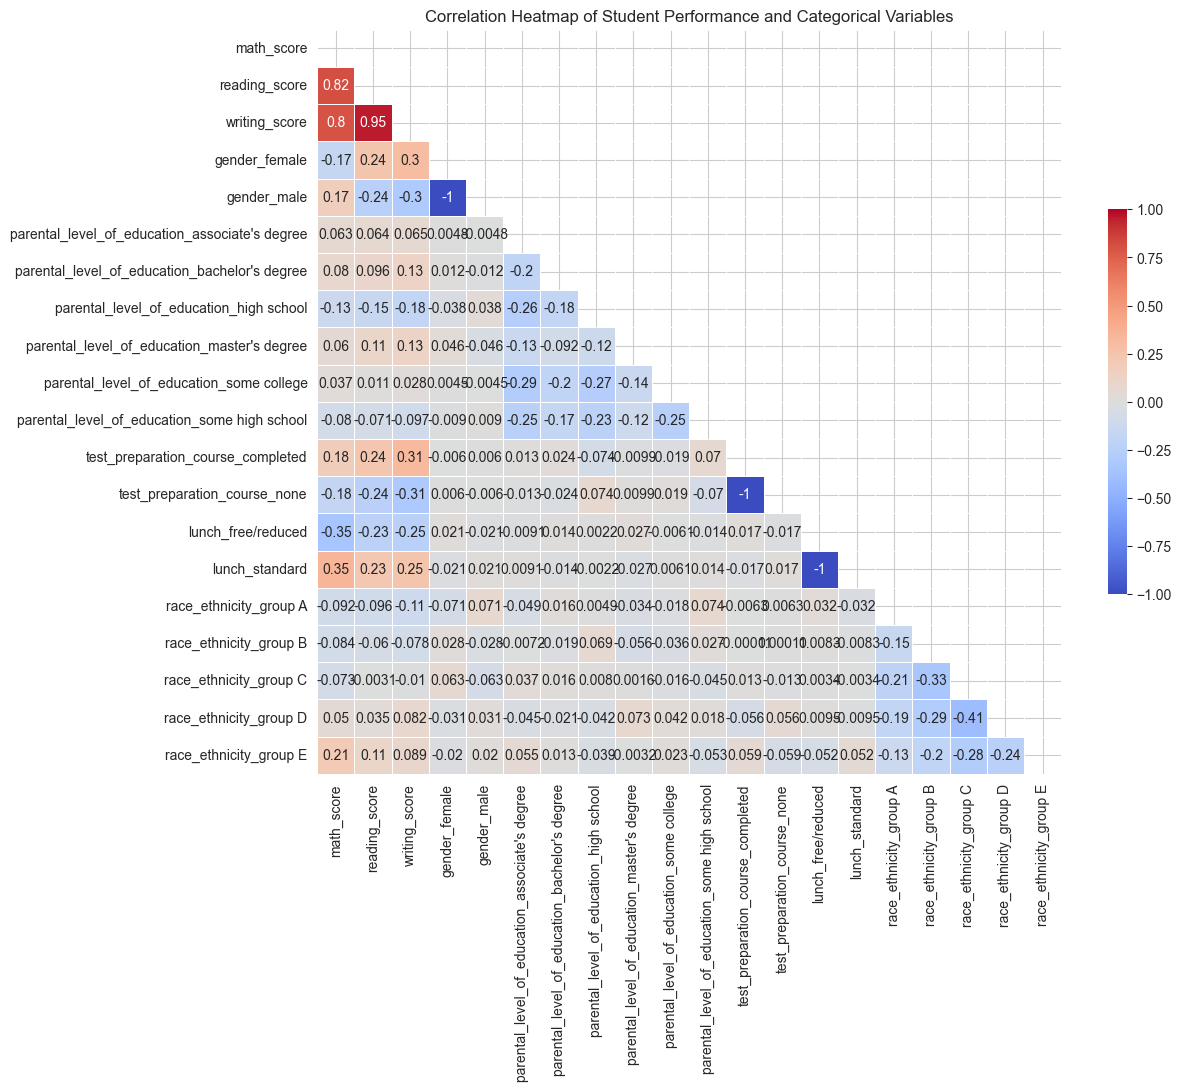

In [30]:
# Generate a mask for the upper triangle (optional, for aesthetics)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap of Student Performance and Categorical Variables')
plt.show()

### Q1: How does the gender of students affect their performance in math, reading, and writing?
Lets do an analysis to answer the question by performing a T Test using the Python library Scipy, and visualising the performance for each of the genders

In [15]:
# Importing the scipy library
import scipy.stats as stats

In [17]:
df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

,gender,math_score,reading_score,writing_score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


The difference in gendered average scores is quite significant, it goes along the long held stereotype that males do better at math and females do better at languages.
Let the null hypothesis be : females have higher averages than males in math, and males have higher averages in language.

In [18]:
# Perform t-tests to compare the means between genders for each subject
# Math score comparison
math_ttest = stats.ttest_ind(df[df['gender'] == 'male']['math_score'],
                             df[df['gender'] == 'female']['math_score'])

# Reading score comparison
reading_ttest = stats.ttest_ind(df[df['gender'] == 'male']['reading_score'],
                                df[df['gender'] == 'female']['reading_score'])

# Writing score comparison
writing_ttest = stats.ttest_ind(df[df['gender'] == 'male']['writing_score'],
                                df[df['gender'] == 'female']['writing_score'])

In [19]:
print(math_ttest.pvalue)
print(reading_ttest.pvalue)
print(writing_ttest.pvalue)

9.120185549328822e-08
4.680538743933289e-15
2.019877706867934e-22


For t-tests, if the p-value obtained is less than the default significance level of 0.05.
The p-value, as expected is less than the default significance, which indicates that the probability of the null hypothesis is close to zero and so it can be rejected.
We can conclude that the male students score higher on the math tests, whereas the female students perform better on language tests

Lets try to visualise our findings using a barplot

In [20]:
# Importing the visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_2963/2250552735.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_col, y=score_col, data=df, palette=palette, ax=axes[i])
/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_2963/2250552735.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_col, y=score_col, data=df, palette=palette, ax=axes[i])
/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_2963/2250552735.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_col, y=score_col, 

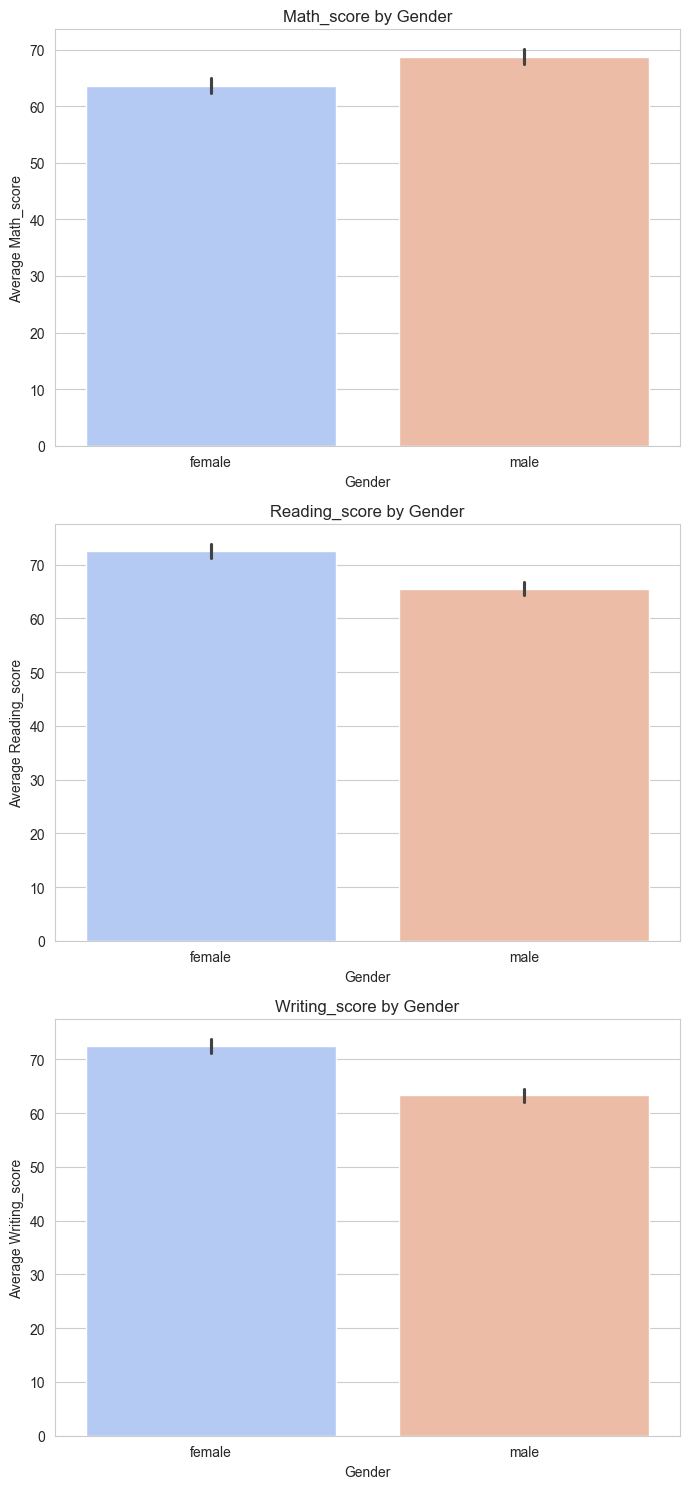

In [21]:
def plot_scores_by_category(df, category_col, score_cols, figsize=(7, 15), palette="coolwarm"):
    """
    Generate bar plots comparing scores across different categories.

    Parameters:
    df (DataFrame): The pandas DataFrame containing the data.
    category_col (str): The column name to categorize data by (e.g., 'gender').
    score_cols (list): List of columns containing the scores to be plotted.
    figsize (tuple): The size of the figure (width, height).
    palette (str): The color palette for the plots.

    Returns:
    None: This function doesn't return anything but plots the specified bar plots.
    """
    sns.set_style("whitegrid")
    f, axes = plt.subplots(len(score_cols), 1, figsize=figsize)

    for i, score_col in enumerate(score_cols):
        sns.barplot(x=category_col, y=score_col, data=df, palette=palette, ax=axes[i])
        axes[i].set_title(f'{score_col.capitalize()} by {category_col.capitalize()}')
        axes[i].set_ylabel(f'Average {score_col.capitalize()}')
        axes[i].set_xlabel(category_col.capitalize())

    plt.tight_layout()
    plt.show()

# Now, you can call this function for 'gender' and scores
plot_scores_by_category(df, 'gender', ['math_score', 'reading_score', 'writing_score'])


### Q2: Does the level of parental education influence student performance across subjects?
To answer this question, we shall perform similar steps of, finding average score for each of the possible education levels and make conclusions based on the visualisations

In [24]:
# Calculating the average scores for each group of parental education
parental_level = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
parental_level

,parental_level_of_education,math_score,reading_score,writing_score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


As we can see, for students who's parents pursued at least one degree, on average score higher than the students whose parents only completed high school education. At the same time, the scores isn't too affected by the level of higher education

/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_8400/1466402299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='math_score', y='parental_level_of_education', data=parental_level, palette='viridis')


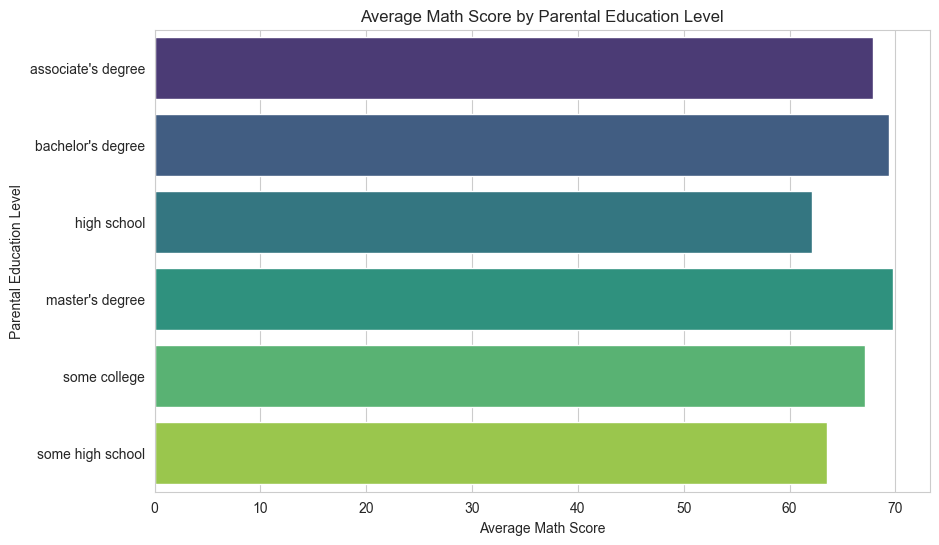

In [42]:
# Lets visualise our results
plt.figure(figsize=(10, 6))
sns.barplot(x='math_score', y='parental_level_of_education', data=parental_level, palette='viridis')
plt.title('Average Math Score by Parental Education Level')
plt.xlabel('Average Math Score')
plt.ylabel('Parental Education Level')
plt.show()

Therefore, we can conclude that the students whose parents pursued any kind of university education correlate to a higher score, but not much between bachelor's or master's.

/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_2963/1316021598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reading_score', y='parental_level_of_education', data=parental_level, palette='viridis')


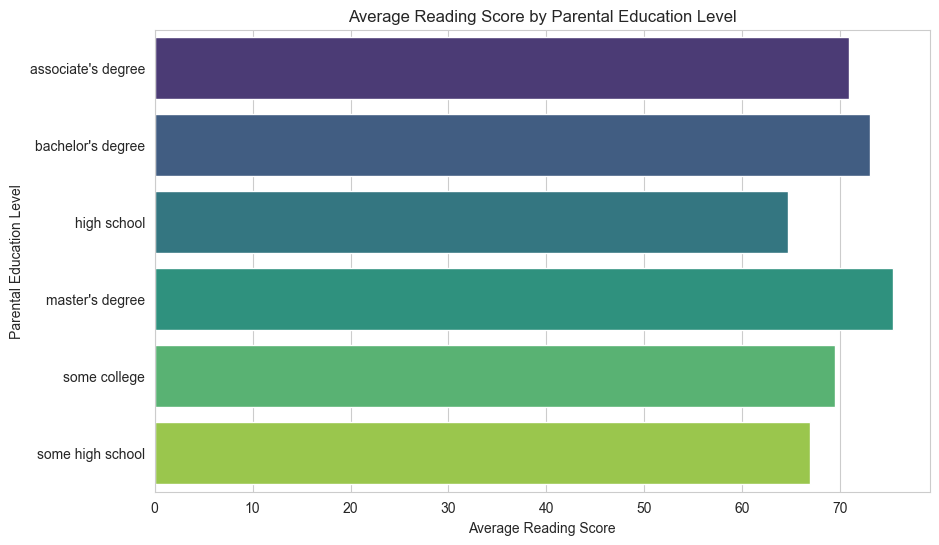

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='reading_score', y='parental_level_of_education', data=parental_level, palette='viridis')
plt.title('Average Reading Score by Parental Education Level')
plt.xlabel('Average Reading Score')
plt.ylabel('Parental Education Level')
plt.show()


For Reading tests, students whose parents had a masters degree performed the best, followed by parents with bachelor's. The observation of parents with only high school education remains the same.

/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_2963/1558403026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='writing_score', y='parental_level_of_education', data=parental_level, palette='viridis')


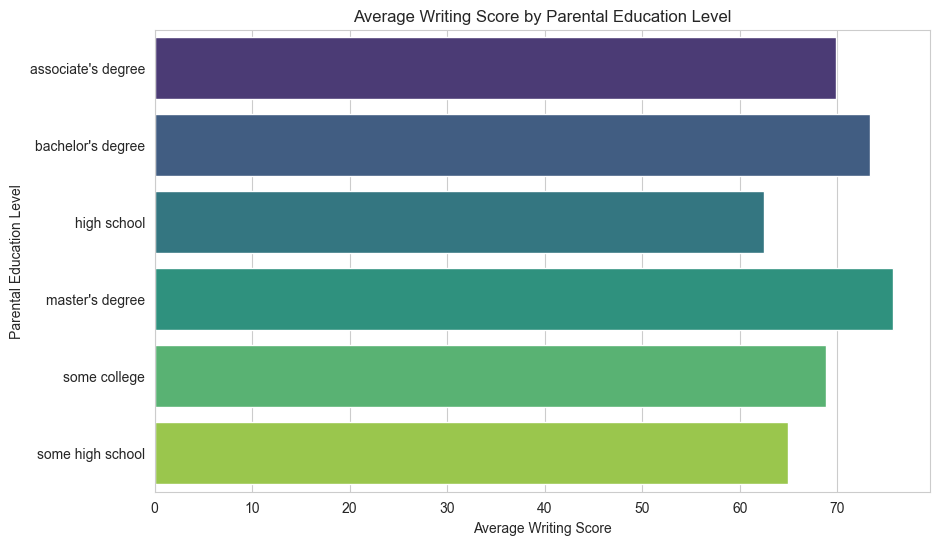

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='writing_score', y='parental_level_of_education', data=parental_level, palette='viridis')
plt.title('Average Writing Score by Parental Education Level')
plt.xlabel('Average Writing Score')
plt.ylabel('Parental Education Level')
plt.show()

We observe a similar trend as we saw for the reading tests, kids whose parents had a masters degree performed best, and the kids whose parents had only had high school education scored lower on average.

### Q3 : How does participation in a test preparation course impact student scores?
Lets try to find out the impact of test preparation courses' impact, using a calculated mean and visualisation.

In [33]:
test_prep = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
test_prep

,test_preparation_course,math_score,reading_score,writing_score
0,completed,69.695531,73.893855,74.418994
1,none,64.077882,66.534268,64.504673


Students who completed a preparation course score higher, we observe.
Now, lets visualise our observations

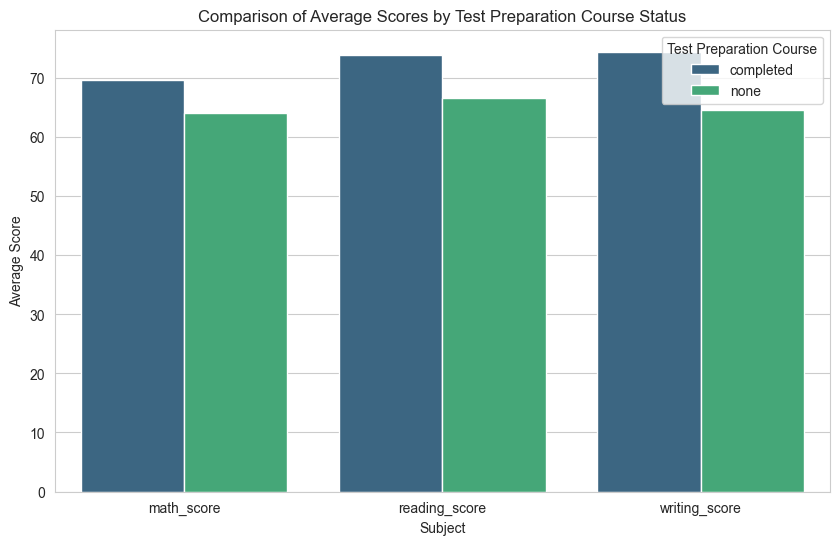

In [34]:
melted_data = pd.melt(test_prep, id_vars=['test_preparation_course'], var_name='Subject', value_name='Average Score')

# Creating the double bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Subject', y='Average Score', hue='test_preparation_course', data=melted_data, palette='viridis')
plt.title('Comparison of Average Scores by Test Preparation Course Status')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.legend(title='Test Preparation Course')
plt.show()

Clearly, taking a preparatory course helps in getting a higher score, although not by too much.

## Conclusions:
1. There is a high correlation between a student scoring high in reading, to also score high on writing tests
2. A student also scores higher if they have scored high in math
4. Gender impacts the scores for males for higher scores on maths, whereas for females in reading and writing tests
5. Parental higher education has positive correlation with higher scores, where as the students who's parents scored only completed high school tend to score lower on average
6. Finishing a preparatory class prepares students to perform better in all subjects